In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')

In [50]:
testy = pd.read_csv('cs-test.csv')

In [3]:
id = test['Unnamed: 0']

In [55]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13.0,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4.0,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2.0,1.0,0,0.0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5.0,0.0,0,0.0,0.0
4,0,0.907239,49,1.0,0.024926,63588.0,7.0,0.0,1,0.0,0.0


In [4]:
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
test.drop(['SeriousDlqin2yrs'],axis=1,inplace=True)

In [9]:
a = test.isnull().sum()
a[a>0]

MonthlyIncome         20103
NumberOfDependents     2626
dtype: int64

In [7]:
combine = [train,test]

In [8]:
for dataset in combine:
    dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median(),inplace=True)
    dataset.NumberOfDependents.fillna(dataset.NumberOfDependents.median(),inplace=True)

In [ ]:
train.shape

In [3]:
train.dropna(how='any',inplace=True)

In [ ]:
train.SeriousDlqin2yrs.unique()

In [ ]:
train.SeriousDlqin2yrs.value_counts()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0.0,0.177513,5700.0,4.0,0.0,0,0.0,0.0
1,NaN,0.463295,57,0.0,0.527237,9141.0,15.0,0.0,4,0.0,2.0
2,NaN,0.043275,59,0.0,0.687648,5083.0,12.0,0.0,1,0.0,2.0
3,NaN,0.280308,38,1.0,0.925961,3200.0,7.0,0.0,2,0.0,0.0
4,NaN,1.000000,27,0.0,0.019917,3865.0,4.0,0.0,0,0.0,1.0


In [ ]:
Outliers_to_drop 

In [ ]:
ab = train.age
ab[ab<22].value_counts()

In [3]:
revNew = []
for val in train.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [11]:
revNew = []
for val in test.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [4]:
revNew

[0.76612660900000007,
 0.9571510190000001,
 0.65818014000000002,
 0.23380977600000002,
 0.90723940000000003,
 0.21317868199999998,
 0.30568246500000001,
 0.75446364799999999,
 0.11695064400000001,
 0.189169052,
 0.64422596200000004,
 0.018798120000000001,
 0.010351856999999999,
 0.96467255500000004,
 0.019656580999999999,
 0.54845806200000002,
 0.061086117999999995,
 0.166284079,
 0.22181277100000002,
 0.60279441099999997,
 0.20092338199999998,
 0.025655677000000002,
 0.99999989999999994,
 0.075426584000000005,
 0.046560270000000001,
 0.39224848200000001,
 0.052436094000000003,
 0.034421473000000001,
 0.45251582799999995,
 0.39299458600000003,
 0.70407398200000004,
 0.99999989999999994,
 0.083418009000000001,
 0.18686855600000002,
 0.69332968099999992,
 0.0,
 0.88183636200000004,
 0.99999989999999994,
 0.36363636399999999,
 0.30449066800000002,
 0.71998530999999999,
 0.072897569999999995,
 0.46905684200000003,
 0.71870537800000001,
 0.36887593299999999,
 0.000602723,
 0.061440132000000

In [10]:
train.RevolvingUtilizationOfUnsecuredLines = revNew

In [12]:
test.RevolvingUtilizationOfUnsecuredLines = revNew

In [13]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [14]:
minUpperBound = min([val for (val, out) in zip(train.DebtRatio, mad_based_outlier(train.DebtRatio)) if out == True])

In [16]:
minUpperBound = min([val for (val, out) in zip(test.DebtRatio, mad_based_outlier(test.DebtRatio)) if out == True])

In [18]:
minUpperBound = min([val for (val, out) in zip(train.NumberRealEstateLoansOrLines, mad_based_outlier(train.NumberRealEstateLoansOrLines)) if out == True])

In [20]:
minUpperBound = min([val for (val, out) in zip(test.NumberRealEstateLoansOrLines, mad_based_outlier(test.NumberRealEstateLoansOrLines)) if out == True])

In [15]:
minUpperBound

7

In [15]:
newDebtRatio = []
for val in train.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
train.DebtRatio = newDebtRatio

In [17]:
newDebtRatio = []
for val in test.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
test.DebtRatio = newDebtRatio

In [19]:
newDebtRatio = []
for val in train.NumberRealEstateLoansOrLines:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
train.NumberRealEstateLoansOrLines = newDebtRatio

In [21]:
newDebtRatio = []
for val in test.NumberRealEstateLoansOrLines:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
test.NumberRealEstateLoansOrLines = newDebtRatio

{'boxes': [<matplotlib.lines.Line2D at 0x24a593e0c18>],
 'caps': [<matplotlib.lines.Line2D at 0x24a593e4fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24a593edf28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24a593ed080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24a593e0e80>,
  <matplotlib.lines.Line2D at 0x24a593e4e48>]}

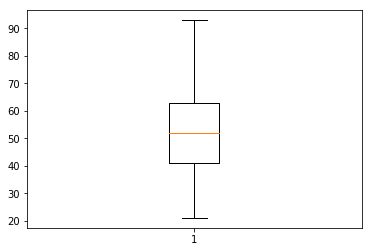

In [39]:
plt.boxplot(test.age)

In [34]:
test[test.age == 0].shape

(0, 10)

In [22]:
new_age = []
for val in train.age:
    if val > 93:
        new_age.append(50)
    else:
        new_age.append(val)
train.age = new_age

new_age = []
for val in train.age:
    if val == 0:
        new_age.append(21)
    else:
        new_age.append(val)
train.age = new_age

In [23]:
new_age = []
for val in test.age:
    if val > 93:
        new_age.append(50)
    else:
        new_age.append(val)
test.age = new_age

{'boxes': [<matplotlib.lines.Line2D at 0x24a574317b8>],
 'caps': [<matplotlib.lines.Line2D at 0x24a549d7e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x24a549dbcc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24a549dc1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24a57430dd8>,
  <matplotlib.lines.Line2D at 0x24a549dd3c8>]}

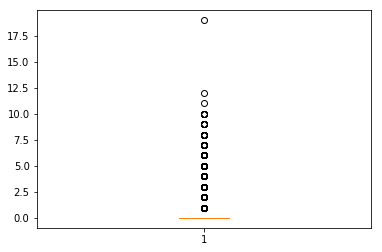

In [46]:
plt.boxplot(test['NumberOfTime30-59DaysPastDueNotWorse'])

In [ ]:
train.NumberOfTimes90DaysLate[train.NumberOfTimes90DaysLate>=96].value_counts()

In [24]:
new = []
for val in train.NumberOfTimes90DaysLate:
    if val>=96:
        new.append(train.NumberOfTimes90DaysLate.median())
    else:
        new.append(val)

train.NumberOfTimes90DaysLate = new

In [25]:
new = []
for val in test.NumberOfTimes90DaysLate:
    if val>=96:
        new.append(test.NumberOfTimes90DaysLate.median())
    else:
        new.append(val)

test.NumberOfTimes90DaysLate = new

In [ ]:
train['NumberOfTime60-89DaysPastDueNotWorse'][train['NumberOfTime60-89DaysPastDueNotWorse']>=96].value_counts()

In [26]:
new = []
for val in train['NumberOfTime30-59DaysPastDueNotWorse']:
    if val>=96:
        new.append(train['NumberOfTime30-59DaysPastDueNotWorse'].median())
    else:
        new.append(val)

train['NumberOfTime30-59DaysPastDueNotWorse'] = new

In [27]:
new = []
for val in test['NumberOfTime30-59DaysPastDueNotWorse']:
    if val>=96:
        new.append(test['NumberOfTime30-59DaysPastDueNotWorse'].median())
    else:
        new.append(val)

test['NumberOfTime30-59DaysPastDueNotWorse'] = new

{'boxes': [<matplotlib.lines.Line2D at 0x20403acc470>],
 'caps': [<matplotlib.lines.Line2D at 0x20403ad4e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x20403ae1748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x20403ada860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x20402d72ef0>,
  <matplotlib.lines.Line2D at 0x20403accf98>]}

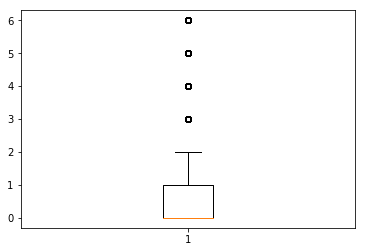

In [21]:
plt.boxplot(train.NumberOfDependents)

In [28]:
new = []
for val in train.NumberOfDependents:
    if val >=7:
        new.append(0)
    else:
        new.append(val)

train.NumberOfDependents = new

In [29]:
new = []
for val in test.NumberOfDependents:
    if val >=7:
        new.append(0)
    else:
        new.append(val)

test.NumberOfDependents = new

In [30]:
new = []
for val in train['NumberOfTime60-89DaysPastDueNotWorse']:
    if val>=96:
        new.append(train['NumberOfTime60-89DaysPastDueNotWorse'].median())
    else:
        new.append(val)

train['NumberOfTime60-89DaysPastDueNotWorse'] = new

In [31]:
new = []
for val in test['NumberOfTime60-89DaysPastDueNotWorse']:
    if val>=96:
        new.append(test['NumberOfTime60-89DaysPastDueNotWorse'].median())
    else:
        new.append(val)

test['NumberOfTime60-89DaysPastDueNotWorse'] = new

{'boxes': [<matplotlib.lines.Line2D at 0x24a550a3b00>],
 'caps': [<matplotlib.lines.Line2D at 0x24a550a8eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24a550aec50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24a550ae630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24a550a3cc0>,
  <matplotlib.lines.Line2D at 0x24a550a8898>]}

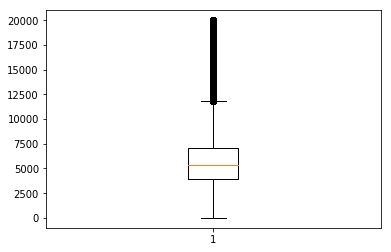

In [56]:
plt.boxplot(test.MonthlyIncome)

In [32]:
new = []
for val in train.MonthlyIncome:
    if val >=100000:
        new.append(train.MonthlyIncome.median())
    else :
        new.append(val)
train.MonthlyIncome = new

In [33]:
new = []
for val in test.MonthlyIncome:
    if val >=20000:
        new.append(test.MonthlyIncome.median())
    else :
        new.append(val)
test.MonthlyIncome = new

In [ ]:
train.MonthlyIncome[train.NumberOfOpenCreditLinesAndLoans>=20].shape

In [ ]:
plt.boxplot(train.NumberOfOpenCreditLinesAndLoans)

In [34]:
new = []
for val in train.NumberOfOpenCreditLinesAndLoans:
    if val >=21:
        new.append(train.NumberOfOpenCreditLinesAndLoans.median())
    else :
        new.append(val)
train.NumberOfOpenCreditLinesAndLoans = new

In [35]:
new = []
for val in test.NumberOfOpenCreditLinesAndLoans:
    if val >=21:
        new.append(test.NumberOfOpenCreditLinesAndLoans.median())
    else :
        new.append(val)
test.NumberOfOpenCreditLinesAndLoans = new

In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

C:\Users\HP ELITE BOOK\Downloads\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
train_target = train.SeriousDlqin2yrs
train_data = train.drop(['SeriousDlqin2yrs'], axis=1)


In [50]:
stacked_averaged_models.fit(train_data.values, train_target)
pred=stacked_averaged_models.predict_proba(xvl)[:,1]
print("\nArea Under Curve: \n{}".format(m.roc_auc_score(target_test ,pred )))

AttributeError: 'StackedAverageModel' object has no attribute 'predict_proba'

In [38]:
X_train, target_train, Y_test, target_test = train_test_split(train_data, train_target, random_state = 42, test_size=0.30, 
                                                                        stratify=train_target)

In [ ]:
i=1
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_i,test_i in kf.split(train_data,train_target):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = train_data.loc[train_i],train_data.loc[test_i]
    ytr,yvl = train_target[train_i],train_target[test_i]
    #model = GradientBoostingClassifier(n_estimators=250)
    #model = RandomForestClassifier(random_state=1,n_estimators=250)
    #model = XGBClassifier()
    stacked_averaged_models.fit(xtr, ytr)
    pred=stacked_averaged_models.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred)
    print('roc_auc_score',score)
    i+=1

In [41]:
model = GradientBoostingClassifier(n_estimators=250)
models = RandomForestClassifier(random_state=1,n_estimators=250)
modelss = XGBClassifier()
modelsss= LogisticRegression()

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
class StackedAverageModel(BaseEstimator,RegressorMixin, TransformerMixin):
    def __init__(self,base_models,meta_model,n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    def fit(self,X,y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, random_state=53, shuffle=True)
        out_of_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_predictions[holdout_index,i] = y_pred
        self.meta_model_.fit(out_of_predictions,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([
            np.column_stack([model.predict(X) for model in self.base_models]).mean(axis=1)
            for self.base_models in self.base_models_])
        return self.meta_model_.predict(predictions)
        

In [46]:
stacked_averaged_models = StackedAverageModel(base_models=(model,models,modelss)
                                             ,meta_model=modelsss)


In [53]:
preds = model.predict_proba(test)[:,1]
my_submission = pd.DataFrame({'id':id,'Probability':preds})
my_submission.to_csv('sub.csv',index=False)

In [54]:
preds

array([ 0.07739397,  0.04483067,  0.01743456, ...,  0.00877044,
        0.05620348,  0.08910695])

In [ ]:
train.isnull().sum()

In [50]:
from sklearn.model_selection import GridSearchCV
adaHyperParams = {'n_estimators': [10,50,100,200,400]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(),
                       param_grid =adaHyperParams , scoring='roc_auc',n_jobs=4,iid=False,cv=10)
gsearch1.fit(X_train, Y_test)



C:\Users\HP ELITE BOOK\Downloads\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84144, std: 0.00750, params: {'n_estimators': 10},
  mean: 0.85984, std: 0.00684, params: {'n_estimators': 50},
  mean: 0.86183, std: 0.00649, params: {'n_estimators': 100},
  mean: 0.86255, std: 0.00632, params: {'n_estimators': 200},
  mean: 0.86235, std: 0.00636, params: {'n_estimators': 400}],
 {'n_estimators': 200},
 0.86255102868390787)

In [ ]:
feat_imp = pd.Series(model.feature_importances_, train_data.columns).sort_values(ascending=False)
feat_imp